###A)Load the dataset which shows 39 columns and 494021 rows. View the dataset
###which must show 38 input feature variables and 1 target (marked as target
###on .csv file provided) variable Obtain input feature variables as X and target
###variable as Y. Normalize X using MinMaxScaler from sklearn library.
###Compute filter-based feature selection algorithm on dataset by reducing the
###number of feature variables to 10 (i.e. 9 input feature variables + 1 target
###variable) from 39 columns and show the first five rows again and name this
###dataset as my data comprising 10 feature variables.

In [120]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score



In [121]:
#Load the dataset
data = pd.read_csv("KDD.csv")


In [122]:
# Extract input feature variables (X) and target variable (Y)
# X = data.drop("target", axis=1)
# Y = data["target"]


In [123]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [124]:

# Normalize X using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [125]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [126]:
# Apply filter-based feature selection to reduce to 10 variables
selector = SelectKBest(score_func=f_classif, k=9)
X_selected = selector.fit_transform(X_normalized, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [127]:

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Combine selected features with the target variable
my_data = pd.DataFrame(X_selected, columns=selected_feature_names)
my_data["target"] = Y

#Display the first five rows of my_data
print(my_data.head())


   logged_in     count  srv_count  serror_rate  same_srv_rate  \
0        1.0  0.015656   0.015656          0.0            1.0   
1        1.0  0.015656   0.015656          0.0            1.0   
2        1.0  0.015656   0.015656          0.0            1.0   
3        1.0  0.011742   0.011742          0.0            1.0   
4        1.0  0.011742   0.011742          0.0            1.0   

   srv_diff_host_rate  dst_host_count  dst_host_same_src_port_rate  \
0                 0.0        0.035294                         0.11   
1                 0.0        0.074510                         0.05   
2                 0.0        0.113725                         0.03   
3                 0.0        0.152941                         0.03   
4                 0.0        0.192157                         0.02   

   dst_host_srv_serror_rate  target  
0                       0.0       0  
1                       0.0       0  
2                       0.0       0  
3                       0.0       0 

###(b) Use sklearn to split my data using train test split into three subsets,###for instance, my data 1 with 70% train & 30% test data, my data 2
###with 60%train & 40% test data, my data 3 with 50%train & 50%
###test data and compute the performance of Decision tree in terms of clas-
###sification report for each subsets.

In [128]:

# Split my_data into three subsets
train1, test1 = train_test_split(my_data, test_size=0.3, random_state=42)
train2, test2 = train_test_split(my_data, test_size=0.4, random_state=42)
train3, test3 = train_test_split(my_data, test_size=0.5, random_state=42)

# Define the Decision Tree classifier
classifier = DecisionTreeClassifier()

# Function to train and evaluate the classifier on a given subset
def evaluate_subset(train, test):
    X_train = train.drop("target", axis=1)
    Y_train = train["target"]
    X_test = test.drop("target", axis=1)
    Y_test = test["target"]

    classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_test)

    report = classification_report(Y_test, predictions)
    return report

# Evaluate the classifier on each subset
report1 = evaluate_subset(train1, test1)
report2 = evaluate_subset(train2, test2)
report3 = evaluate_subset(train3, test3)

# Print the classification report for each subset
print("Subset 1 (70% train, 30% test):\n", report1)
print("\nSubset 2 (60% train, 40% test):\n", report2)
print("\nSubset 3 (50% train, 50% test):\n", report3)


Subset 1 (70% train, 30% test):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207


Subset 2 (60% train, 40% test):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609


Subset 3 (50% train, 50% test):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98    

Best Split Max Depth: 8
Best Split aCCURCY: 0.9901219240656649


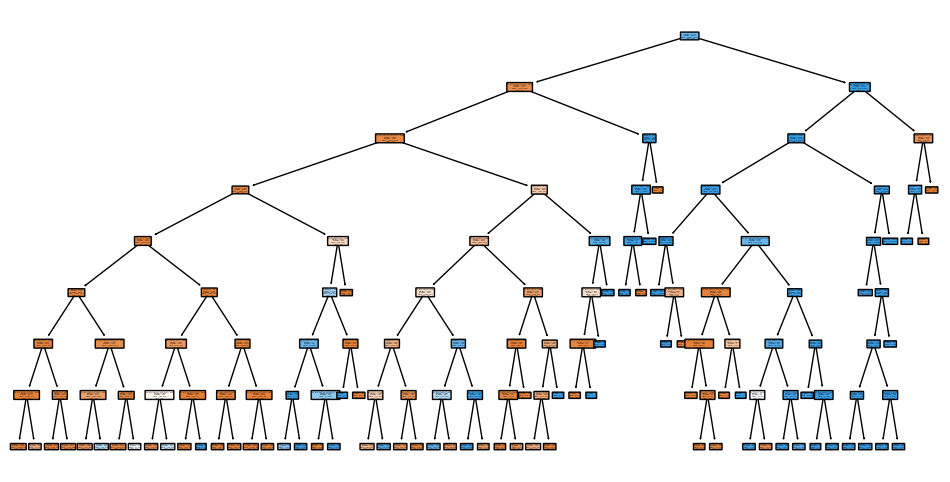

In [108]:

# Define the maximum depths to consider
max_depths = [4, 6, 8]

# Function to train a Decision Tree classifier and visualize the tree
def visualize_best_split(train, test, max_depth):
    X_train = train.drop("target", axis=1)
    Y_train = train["target"]
    X_test = test.drop("target", axis=1)
    Y_test = test["target"]

    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    classifier.fit(X_train, Y_train)

    plt.figure(figsize=(12, 6))
    plot_tree(classifier, filled=True, rounded=True, feature_names=X_train.columns, class_names=True)
    plt.show()

# Evaluate the performance for each subset and maximum depth
best_max_depth = None
best_accuracy = 0.0

for max_depth in max_depths:
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    classifier.fit(train1.drop("target", axis=1), train1["target"])
    accuracy = classifier.score(test1.drop("target", axis=1), test1["target"])

    if accuracy > best_accuracy:
        best_max_depth = max_depth
        best_accuracy = accuracy

# Visualize the Decision Tree for the best split only
print("Best Split Max Depth:", best_max_depth)
print("Best Split aCCURCY:", best_accuracy)
visualize_best_split(train1, test1, best_max_depth)


##Accurcy shick

In [109]:

#Function to train a Decision Tree classifier and calculate accuracy
def evaluate_accuracy(train, test, max_depth):
    X_train = train.drop("target", axis=1)
    Y_train = train["target"]
    X_test = test.drop("target", axis=1)
    Y_test = test["target"]

    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    classifier.fit(X_train, Y_train)

    accuracy = classifier.score(X_test, Y_test)
    return accuracy



# Evaluate the accuracy for each subset and maximum depth
results = []
for max_depth in max_depths:
    accuracy1 = evaluate_accuracy(train1, test1, max_depth)
    accuracy2 = evaluate_accuracy(train2, test2, max_depth)
    accuracy3 = evaluate_accuracy(train3, test3, max_depth)

    results.append((accuracy1, accuracy2, accuracy3))

# Print the accuracy and corresponding maximum depth for each subset
for i, max_depth in enumerate(max_depths):
    print("Subset 1 (70% train, 30% test) - Max Depth:", max_depth)
    print("Accuracy:", results[i][0])
    print()

    print("Subset 2 (60% train, 40% test) - Max Depth:", max_depth)
    print("Accuracy:", results[i][1])
    print()

    print("Subset 3 (50% train, 50% test) - Max Depth:", max_depth)
    print("Accuracy:", results[i][2])
    print()









Subset 1 (70% train, 30% test) - Max Depth: 4
Accuracy: 0.9857159243490523

Subset 2 (60% train, 40% test) - Max Depth: 4
Accuracy: 0.9858710888674099

Subset 3 (50% train, 50% test) - Max Depth: 4
Accuracy: 0.986073494702665

Subset 1 (70% train, 30% test) - Max Depth: 6
Accuracy: 0.9885160619943727

Subset 2 (60% train, 40% test) - Max Depth: 6
Accuracy: 0.9887808753649885

Subset 3 (50% train, 50% test) - Max Depth: 6
Accuracy: 0.988931667010781

Subset 1 (70% train, 30% test) - Max Depth: 8
Accuracy: 0.9901151767460377

Subset 2 (60% train, 40% test) - Max Depth: 8
Accuracy: 0.9902433593611627

Subset 3 (50% train, 50% test) - Max Depth: 8
Accuracy: 0.9904133823999741































































##Another answer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


   logged_in     count  srv_count  serror_rate  same_srv_rate  \
0        1.0  0.015656   0.015656          0.0            1.0   
1        1.0  0.015656   0.015656          0.0            1.0   
2        1.0  0.015656   0.015656          0.0            1.0   
3        1.0  0.011742   0.011742          0.0            1.0   
4        1.0  0.011742   0.011742          0.0            1.0   

   srv_diff_host_rate  dst_host_count  dst_host_same_src_port_rate  \
0                 0.0        0.035294                         0.11   
1                 0.0        0.074510                         0.05   
2                 0.0        0.113725                         0.03   
3                 0.0        0.152941                         0.03   
4                 0.0        0.192157                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  target  
0                   0.0                       0.0       0  
1                   0.0                       0.0       0  
2       

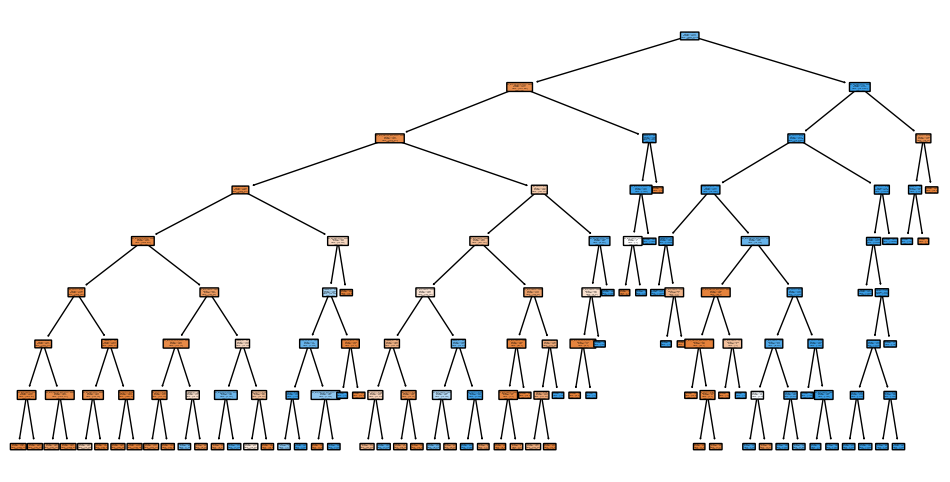

In [110]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("KDD.csv")

# Extract input feature variables (X) and target variable (Y)
X = data.drop("target", axis=1)
Y = data["target"]

# Normalize X using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply filter-based feature selection to reduce to 10 variables
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_normalized, Y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Combine selected features with the target variable
my_data = pd.DataFrame(X_selected, columns=selected_feature_names)
my_data["target"] = Y

# Display the first five rows of my_data
print(my_data.head())

# Split my_data into three subsets
train1, test1 = train_test_split(my_data, test_size=0.3, random_state=42)
train2, test2 = train_test_split(my_data, test_size=0.4, random_state=42)
train3, test3 = train_test_split(my_data, test_size=0.5, random_state=42)

# Define the Decision Tree classifier
classifier = DecisionTreeClassifier(criterion='entropy')

# Function to train and evaluate the classifier on a given subset
def evaluate_subset(train, test):
    X_train = train.drop("target", axis=1)
    Y_train = train["target"]
    X_test = test.drop("target", axis=1)
    Y_test = test["target"]

    classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_test)

    report = classification_report(Y_test, predictions)
    return report , classifier

# Evaluate the classifier on each subset
report1, dt_classifier_1 = evaluate_subset(train1, test1)
report2 ,dt_classifier_2= evaluate_subset(train2, test2)
report3 ,dt_classifier_3= evaluate_subset(train3, test3)

# Print the classification report for each subset
print("Subset 1 (70% train, 30% test):\n", report1)
print("\nSubset 2 (60% train, 40% test):\n", report2)
print("\nSubset 3 (50% train, 50% test):\n", report3)

# Define the maximum depths to consider
max_depths = [4, 6, 8]

# Function to train a Decision Tree classifier and calculate accuracy
def evaluate_accuracy(train, test, max_depth):
    X_train = train.drop("target", axis=1)
    Y_train = train["target"]
    X_test = test.drop("target", axis=1)
    Y_test = test["target"]

    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    classifier.fit(X_train, Y_train)

    accuracy = classifier.score(X_test, Y_test)
    return accuracy

# Evaluate the accuracy for each subset and maximum depth
best_max_depth = None
best_accuracy = 0.0

for max_depth in max_depths:
    accuracy1 = evaluate_accuracy(train1, test1, max_depth)
    accuracy2 = evaluate_accuracy(train2, test2, max_depth)
    accuracy3 = evaluate_accuracy(train3, test3, max_depth)

    if accuracy1 > best_accuracy:
        best_max_depth = max_depth
        best_accuracy = accuracy1

# Visualize the Decision Tree for the best split only
print("Best Split (Subset 1 - 70% train, 30% test) - Max Depth:", best_max_depth)
print("Accuracy:", best_accuracy)
visualize_best_split(train1, test1, best_max_depth)


In [111]:
# from google.colab import drive
# drive.mount('/content/drive')

D and E


In [112]:

def tuned_dt(xtrain, ytrain, xtest, ytest  ,key,xReport,yReport):
    depth = [4, 6, 8]
    accuracy = []
    clfs = []
    for n in depth:
        xReport.append (key+ "d "+ str(n))
        classifier = DecisionTreeClassifier(criterion='entropy', max_depth=n)
        classifier.fit(xtrain, ytrain)
        accuracy.append(classifier.score(xtest, ytest))
        yReport.append (classifier.score(xtest, ytest))
        clfs.append(classifier)

    return clfs[accuracy.index(max(accuracy))]


In [113]:
X_train1 = train1.drop("target", axis=1)
Y_train1 = train1["target"]

X_train2 = train2.drop("target", axis=1)
Y_train2 = train2["target"]

X_train3 = train3.drop("target", axis=1)
Y_train3 = train3["target"]

X_test1 = test1.drop("target", axis=1)
Y_test1 = test1["target"]

X_test2 = test2.drop("target", axis=1)
Y_test2 = test2["target"]

X_test3 = test3.drop("target", axis=1)
Y_test3 = test3["target"]



Text(0.5, 1.0, 'models vs accuracy')

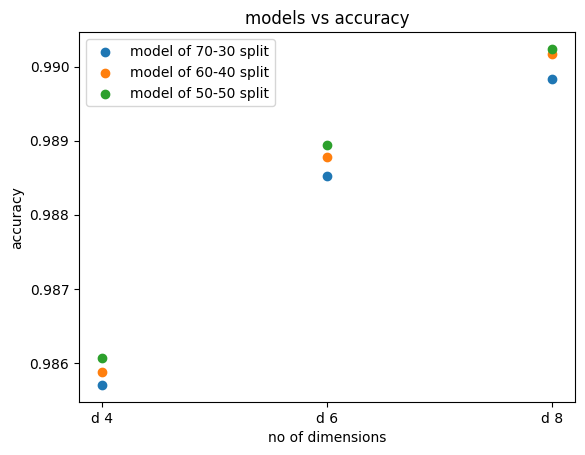

In [140]:
x_plott= []
y_plott=[]

dt_classifier_1= tuned_dt(X_train1,Y_train1,X_test1,Y_test1,"",x_plott,y_plott )
plt.scatter(x_plott,y_plott ,label='model of 70-30 split')

x_plott= []
y_plott=[]
dt_classifier_2= tuned_dt(X_train2,Y_train2,X_test2,Y_test2 ,"",x_plott,y_plott )
plt.scatter(x_plott,y_plott ,label='model of 60-40 split')

x_plott= []
y_plott=[]
dt_classifier_3= tuned_dt(X_train3,Y_train3,X_test3,Y_test3,"",x_plott,y_plott  )
plt.scatter(x_plott,y_plott ,label='model of 50-50 split')
x_plott= []
y_plott=[]

plt.legend()
plt.xlabel('no of dimensions')
plt.ylabel('accuracy')
plt.title('models vs accuracy')

In [141]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data for my_data 1: 30% test data
y_pred_1 = dt_classifier_1.predict(X_test1)
accuracy_1 = accuracy_score(Y_test1, y_pred_1)
classification_report_1 = classification_report(Y_test1, y_pred_1)
confusion_matrix_1 = confusion_matrix(Y_test1, y_pred_1)

# Predict on test data for my_data 2: 40% test data
y_pred_2 = dt_classifier_2.predict(X_test2)
accuracy_2 = accuracy_score(Y_test2, y_pred_2)
classification_report_2 = classification_report(Y_test2, y_pred_2)
confusion_matrix_2 = confusion_matrix(Y_test2, y_pred_2)

# Predict on test data for my_data 3: 50% test data
y_pred_3 = dt_classifier_3.predict(X_test3)
accuracy_3 = accuracy_score(Y_test3, y_pred_3)
classification_report_3 = classification_report(Y_test3, y_pred_3)
confusion_matrix_3 = confusion_matrix(Y_test3, y_pred_3)



In [142]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

Accuracy Score for my_data 1: 0.9898317893216919
Classification Report for my_data 1:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29192
           1       1.00      0.99      0.99    119015

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207



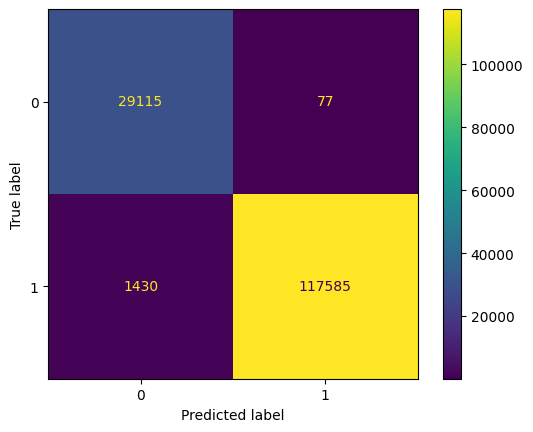

In [143]:
# Print the accuracy scores, classification reports, and confusion matrices
print("Accuracy Score for my_data 1:", accuracy_1)
print("Classification Report for my_data 1:")
print(classification_report_1)
# print("Confusion Matrix for my_data 1:")
# print(confusion_matrix_1)
ConfusionMatrixDisplay.from_estimator(dt_classifier_1, X_test1, Y_test1)


Accuracy Score for my_data 2: 0.9901674518873128
Classification Report for my_data 2:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     38977
           1       1.00      0.99      0.99    158632

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609



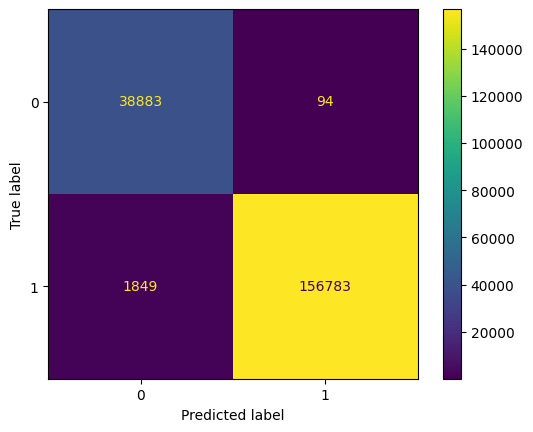

In [144]:

print("Accuracy Score for my_data 2:", accuracy_2)
print("Classification Report for my_data 2:")
print(classification_report_2)
# print("Confusion Matrix for my_data 2:")
# print(confusion_matrix_2)
ConfusionMatrixDisplay.from_estimator(dt_classifier_2, X_test2, Y_test2)



Accuracy Score for my_data 3: 0.9902393010837574
Classification Report for my_data 3:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     48650
           1       1.00      0.99      0.99    198361

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011



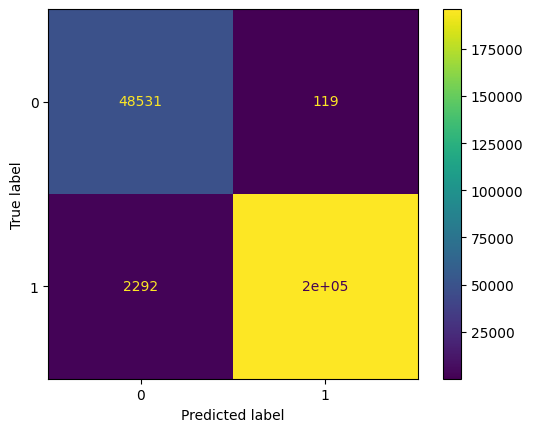

In [145]:

print("Accuracy Score for my_data 3:", accuracy_3)
print("Classification Report for my_data 3:")
print(classification_report_3)
# print("Confusion Matrix for my_data 3:")
# print(confusion_matrix_3)
ConfusionMatrixDisplay.from_estimator(dt_classifier_3, X_test3, Y_test3)


In [134]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Train Decision Tree on my_data 1: 70% train & 30% test data
my_dt_classifier = DecisionTreeClassifier()
my_dt_classifier.fit(X_train1, Y_train1)

# Calculate F1 scores for train and test data
train_f1 = f1_score(Y_train1, my_dt_classifier.predict(X_train1))
test_f1 = f1_score(Y_test1, my_dt_classifier.predict(X_test1))
print("F1 score (Train):", train_f1)
print("F1 score (Test):", test_f1)

# Apply pre-pruning by setting max_depth and other parameters
pruned_classifier = DecisionTreeClassifier(max_depth=4)
pruned_classifier.fit(X_train1, Y_train1)

# Calculate F1 scores again after pre-pruning
pruned_train_f1 = f1_score(Y_train1, pruned_classifier.predict(X_train1))
pruned_test_f1 = f1_score(Y_test1, pruned_classifier.predict(X_test1))
print("F1 score (Train - Pruned):", pruned_train_f1)
print("F1 score (Test - Pruned):", pruned_test_f1)

# Apply post-pruning using cost complexity pruning (ccp)
pruned_classifier_ccp = DecisionTreeClassifier(ccp_alpha=0.01)
pruned_classifier_ccp.fit(X_train1, Y_train1)

# Calculate F1 scores again after post-pruning
pruned_train_f1_ccp = f1_score(Y_train1, pruned_classifier_ccp.predict(X_train1))
pruned_test_f1_ccp = f1_score(Y_test1, pruned_classifier_ccp.predict(X_test1))
print("F1 score (Train - Pruned with ccp):", pruned_train_f1_ccp)
print("F1 score (Test - Pruned with ccp):", pruned_test_f1_ccp)

# Apply k-fold cross-validation
cv_scores = cross_val_score(my_dt_classifier, X_train1, Y_train1, cv=5)
print("Cross-validation scores:", cv_scores)


F1 score (Train): 0.9957188578078889
F1 score (Test): 0.9942146808797733
F1 score (Train - Pruned): 0.9917437443822668
F1 score (Test - Pruned): 0.9916463994924395
F1 score (Train - Pruned with ccp): 0.9873992173562337
F1 score (Test - Pruned with ccp): 0.9871038603603796
Cross-validation scores: [0.99145497 0.99155618 0.99112242 0.99097783 0.99058732]


In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np
y_train1=Y_train1
y_test1=Y_test1
# Create an instance of Decision Tree classifier
train_f1_without_mitigation= []
test_f1_without_mitigation=[]
train_f1_pre_pruned=[]
test_f1_pre_pruned=[]
train_f1_post_pruned=[]
test_f1_post_pruned=[]
train_f1_cv=[]
test_f1_cv=[]
i=[]
for epoch in range(10):
  dt_classifier = DecisionTreeClassifier(ccp_alpha=0.01 ,max_depth=8)
  dt_classifier.fit(X_train1, y_train1)
  i.append(epoch)

  # Train Decision Tree on my_data 1: 70% train & 30% test data

  # Calculate F1 scores for train and test data without mitigation
  train_f1_without_mitigation.append(f1_score(y_train1, dt_classifier.predict(X_train1)))
  test_f1_without_mitigation.append(f1_score(y_test1, dt_classifier.predict(X_test1)))

  print("F1 score (Train) without mitigation:", train_f1_without_mitigation)
  print("F1 score (Test) without mitigation:", test_f1_without_mitigation)

  # a- Pre-pruning
  pre_pruned_classifier = DecisionTreeClassifier(max_depth=4)
  pre_pruned_classifier.fit(X_train1, y_train1)
  train_f1_pre_pruned.append( f1_score(y_train1, pre_pruned_classifier.predict(X_train1)))
  test_f1_pre_pruned.append(f1_score(y_test1, pre_pruned_classifier.predict(X_test1)))
  print("F1 score (Train) with pre-pruning:", train_f1_pre_pruned)
  print("F1 score (Test) with pre-pruning:", test_f1_pre_pruned)

  # b- Post-pruning using cost complexity pruning (ccp)
  post_pruned_classifier = DecisionTreeClassifier(ccp_alpha=0.01)
  post_pruned_classifier.fit(X_train1, y_train1)
  train_f1_post_pruned.append(f1_score(y_train1, post_pruned_classifier.predict(X_train1)))
  test_f1_post_pruned.append(f1_score(y_test1, post_pruned_classifier.predict(X_test1)))
  print("F1 score (Train) with post-pruning (ccp):", train_f1_post_pruned)
  print("F1 score (Test) with post-pruning (ccp):", test_f1_post_pruned)

  # c- K-fold cross-validation
  cv_scores = cross_val_score(dt_classifier, X_train1, y_train1, cv=5)
  print("Cross-validation scores:", cv_scores)

  # Calculate F1 scores with k-fold cross-validation
  train_f1_cv.append(np.mean(cross_val_score(dt_classifier, X_train1, y_train1, cv=5, scoring='f1_macro')))
  test_f1_cv.append( np.mean(cross_val_score(dt_classifier, X_test1, y_test1, cv=5, scoring='f1_macro')))
  print("F1 score (Train) with k-fold cross-validation:", train_f1_cv)
  print("F1 score (Test) with k-fold cross-validation:", test_f1_cv)





F1 score (Train) without mitigation: [0.9873992173562337]
F1 score (Test) without mitigation: [0.9871038603603796]
F1 score (Train) with pre-pruning: [0.9917437443822668]
F1 score (Test) with pre-pruning: [0.9916463994924395]
F1 score (Train) with post-pruning (ccp): [0.9873992173562337]
F1 score (Test) with post-pruning (ccp): [0.9871038603603796]
Cross-validation scores: [0.98011943 0.98000376 0.97978688 0.98049535 0.97923715]
F1 score (Train) with k-fold cross-validation: [0.9691124902433241]
F1 score (Test) with k-fold cross-validation: [0.9684549802540816]
F1 score (Train) without mitigation: [0.9873992173562337, 0.9873992173562337]
F1 score (Test) without mitigation: [0.9871038603603796, 0.9871038603603796]
F1 score (Train) with pre-pruning: [0.9917437443822668, 0.9917437443822668]
F1 score (Test) with pre-pruning: [0.9916463994924395, 0.9916463994924395]
F1 score (Train) with post-pruning (ccp): [0.9873992173562337, 0.9873992173562337]
F1 score (Test) with post-pruning (ccp): [0

Text(0.5, 1.0, '')

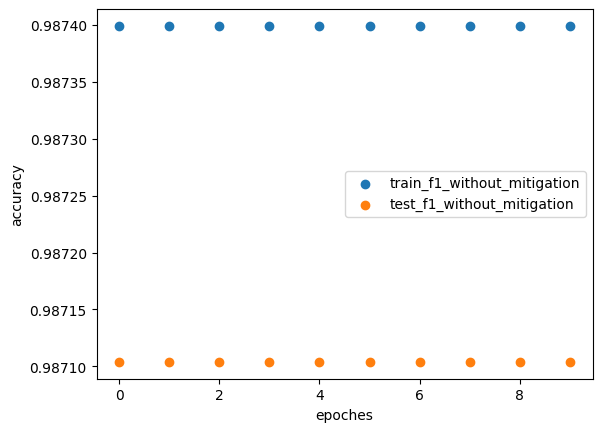

In [159]:
plt.scatter(i ,train_f1_without_mitigation,label='train_f1_without_mitigation')
plt.scatter(i ,test_f1_without_mitigation,label='test_f1_without_mitigation')


plt.legend()
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('')

Text(0.5, 1.0, '')

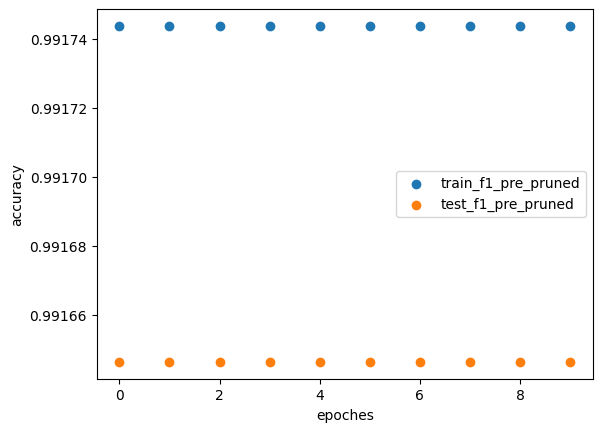

In [156]:
plt.scatter(i ,train_f1_pre_pruned,label='train_f1_pre_pruned')
plt.scatter(i ,test_f1_pre_pruned,label='test_f1_pre_pruned')


plt.legend()
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('')

Text(0.5, 1.0, '')

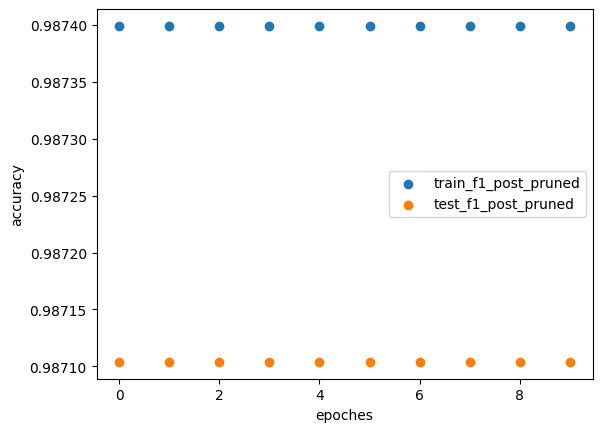

In [157]:
plt.scatter(i ,train_f1_post_pruned,label='train_f1_post_pruned')
plt.scatter(i ,test_f1_post_pruned,label='test_f1_post_pruned')

plt.legend()
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('')

Text(0.5, 1.0, '')

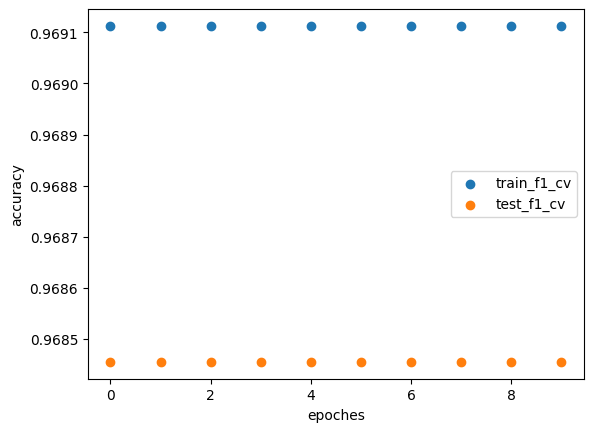

In [158]:
plt.scatter(i ,train_f1_cv,label='train_f1_cv')
plt.scatter(i ,test_f1_cv,label='test_f1_cv')


plt.legend()
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('')